# Nigeria GDP per capita

The gross domestic product per capita, or GDP per capita, is a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic product by its total population.

A country's GDP or gross domestic product is calculated by taking into account the monetary worth of a nation's goods and services after a certain period of time, usually one year. It's a measure of economic activity.

Then, this amount of wealth is divided among a given country's population to solve for its GDP per capita.https://www.thebalance.com/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848

Data from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=NG

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [40]:
df = pd.read_csv('train_data.csv')
df.head()

,Year,GDP_per_capita
0,1960,92.960470
1,1961,96.979045
2,1962,104.387020
3,1963,107.540568
4,1964,113.168721


In [41]:
df.shape

(60, 2)

In [42]:
df.describe()

,Year,GDP_per_capita
count,60.000000,60.000000
mean,1989.500000,953.843306
std,17.464249,881.156442
min,1960.000000,92.960470
25%,1974.750000,308.546498
50%,1989.500000,562.115426
75%,2004.250000,1703.295866
max,2019.000000,3222.693537


In [43]:
df.isnull().sum()

Year              0
GDP_per_capita    0
dtype: int64

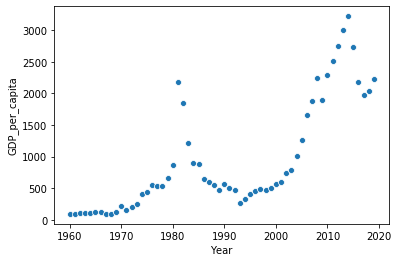

In [44]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Year", y="GDP_per_capita", 
                     palette=cmap ,data=df)

In [45]:
reg = linear_model.LinearRegression()
reg.fit(df[['Year']], df.GDP_per_capita)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
reg.predict(np.array([2022]).reshape(-1, 1))

array([2220.57156623])

In [74]:
df1 = pd.read_csv('test_data.csv')
df1 = df1.drop(['GDP_per_capita'], axis=1)
df1.head()

,Year
0,2020
1,2021
2,2022
3,2023
4,2024


In [75]:
df1['GDP_per_capita'] = reg.predict(df1)

In [76]:
df1.tail(4)

,Year,GDP_per_capita
27,2047,3194.977920
28,2048,3233.954174
29,2049,3272.930428
30,2050,3311.906683


In [77]:
df1.describe()

,Year,GDP_per_capita
count,31.000000,31.000000
mean,2035.000000,2727.262870
std,9.092121,354.376824
min,2020.000000,2142.619058
25%,2027.500000,2434.940964
50%,2035.000000,2727.262870
75%,2042.500000,3019.584776
max,2050.000000,3311.906683


In [79]:
df1.to_csv('per_capita_prediction.csv', index = False)